# BigMart Sales Analysis and Prediction

This notebook demonstrates the steps for data preprocessing, visualization, model training, and evaluation using the BigMart dataset.


In [2]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

### Data loading 📂

In [3]:
#list all files under the input directory
for dirname, _, filenames in os.walk('../data/raw'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/raw\Test.csv
../data/raw\Train.csv


In [4]:
#path for the training set
tr_path = "../data/raw/Train.csv"
#path for the testing set
te_path = "../data/raw/Test.csv"

### Preprocessing and Data Analysis 💻

First look at the data:



Training set:

In [5]:
# read in csv file as a DataFrame
tr_df = pd.read_csv(tr_path)
# explore the first 5 rows
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Testing set:

In [6]:
# read in csv file as a DataFrame
te_df = pd.read_csv(te_path)
# explore the first 5 rows
te_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Size of each data set:

In [7]:
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}")

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)


#### preprocessing of the training dataset

In [8]:
#column information
tr_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#summary statistics test
te_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [27]:
#summary statistics train
tr_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Missing values 🚫

There are many ways data can end up with missing values. For example:
1. The product wasn't weighed.
2. The data provider didn't include the outlet size of some products.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

* by numbers
* by %

This analysis will also compare to the test and train datasets for evaluation.

In [10]:
# missing values in decsending order
print("Train:\n")
print(tr_df.isnull().sum().sort_values(ascending=False),"\n\n",tr_df.isnull().sum()/tr_df.shape[0] *100,"\n\n")
print("Test:\n")
print(te_df.isnull().sum().sort_values(ascending=False),"\n\n",te_df.isnull().sum()/te_df.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

We can see the % of each missing Values per columns is almost identical!

| column           | size |
|------------------|------|
| `Outlet_Size`    | 28%  |
| `Item_Weight`    | 17%  |

Let's check the value counts for `Outlet_Size` and `Item_Weight`:

In [11]:
print("Outlet_Size:\n", tr_df.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", tr_df.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64 


Item_Weight:
 Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64 




`Outlet_Size` is a categorical column, therefore we will impute missing values with `Medium` the **mode value**

In [12]:
print("test mode, train mode\n",[tr_df['Outlet_Size'].mode().values[0], te_df['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [13]:
#train
tr_df['Outlet_Size'] = tr_df['Outlet_Size'].fillna(
tr_df['Outlet_Size'].dropna().mode().values[0])

#test
te_df['Outlet_Size'] = te_df['Outlet_Size'].fillna(
te_df['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
tr_df['Outlet_Size'].isnull().sum(),te_df['Outlet_Size'].isnull().sum()

(0, 0)

`item_weight`  is a numerical column therefore we need to visualize it's distribution for a clearer display
i will use the boxplot in seaborn:

  <tr><td>
    <img src="https://miro.medium.com/max/1050/1*2c21SkzJMf3frPXPAR_gZA.png"
         width="400" height="300">
      <tr><td align="LEFT">

Text(0.5, 1.0, 'Item_Weight Boxplot')

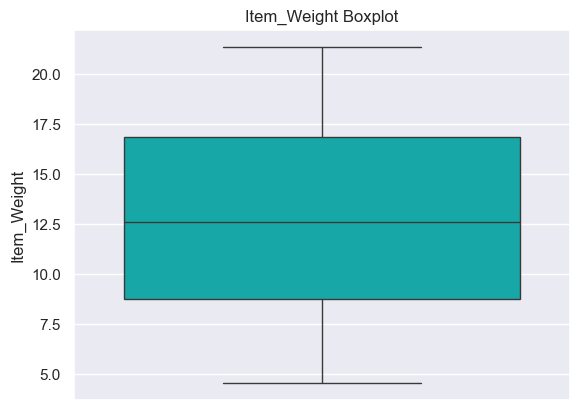

In [14]:
# I personally prefer a vertical view and a cyan color
sns.boxplot(data=tr_df['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

There are no outliers so we will fill the missing data with the mean value for maximum efficiency:

In [15]:
#train
tr_df['Item_Weight'] = tr_df['Item_Weight'].fillna(
tr_df['Item_Weight'].dropna().mean())

#test
te_df['Item_Weight'] = te_df['Item_Weight'].fillna(
te_df['Item_Weight'].dropna().mean())

#checking if we filled missing values
tr_df['Item_Weight'].isnull().sum(),te_df['Item_Weight'].isnull().sum()

(0, 0)

Now we can see using the `.info()` method we can see we have filled succesfully all mising the missing data for both sets:

In [16]:
print("train:\n")
print(tr_df.info())
print("\n\ntest:\n")
print(te_df.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

### Data Exploration

Firstly we need to split our data to categorical and numerical data,

using the `.select_dtypes('dtype').columns.to_list()` combination.

In [17]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  tr_df[num]
#categoric df
BM_cat = tr_df[cat]

#print(num)
#print(cat)

[tr_df[category].value_counts() for category in cat[1:]]

[Item_Fat_Content
 Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: count, dtype: int64,
 Item_Type
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: count, dtype: int64,
 Outlet_Identifier
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: count, dtype: int64,
 Outlet_Size
 Medium    5203
 Small     2388
 High       932
 Name: count, dtype: int64,
 Outlet_Location_Type
 Tier 3    3350
 Tier 2   

We can See we have Repeating values with different names in the `Item_Fat_Content` column,
we will correct them using the using the `.replace()` method

In [18]:
#train
tr_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
te_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
tr_df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Let's take a look again at our data:

In [19]:
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


`Outlet_Establishment_Year` is quite useless as it is, making a new column with the age the new name will be `Outlet_Age`

In [20]:
#creating our new column for both datasets
tr_df['Outlet_Age'], te_df['Outlet_Age']= tr_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), te_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

##uncomment to check result
#tr_df['Outlet_Age'].head
#te_df['Outlet_Age'].head

### Data Visualization 📊

#### Univariate Plots
For starters we will create countplots for the categorical columns:

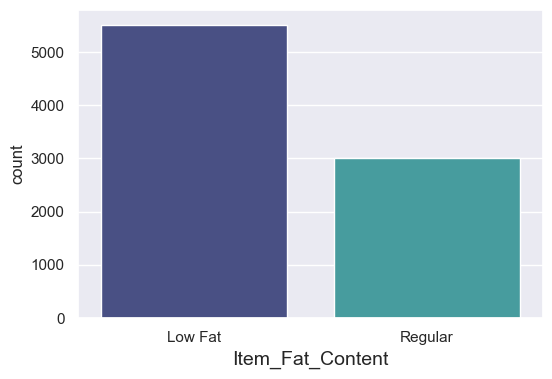

In [21]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=tr_df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

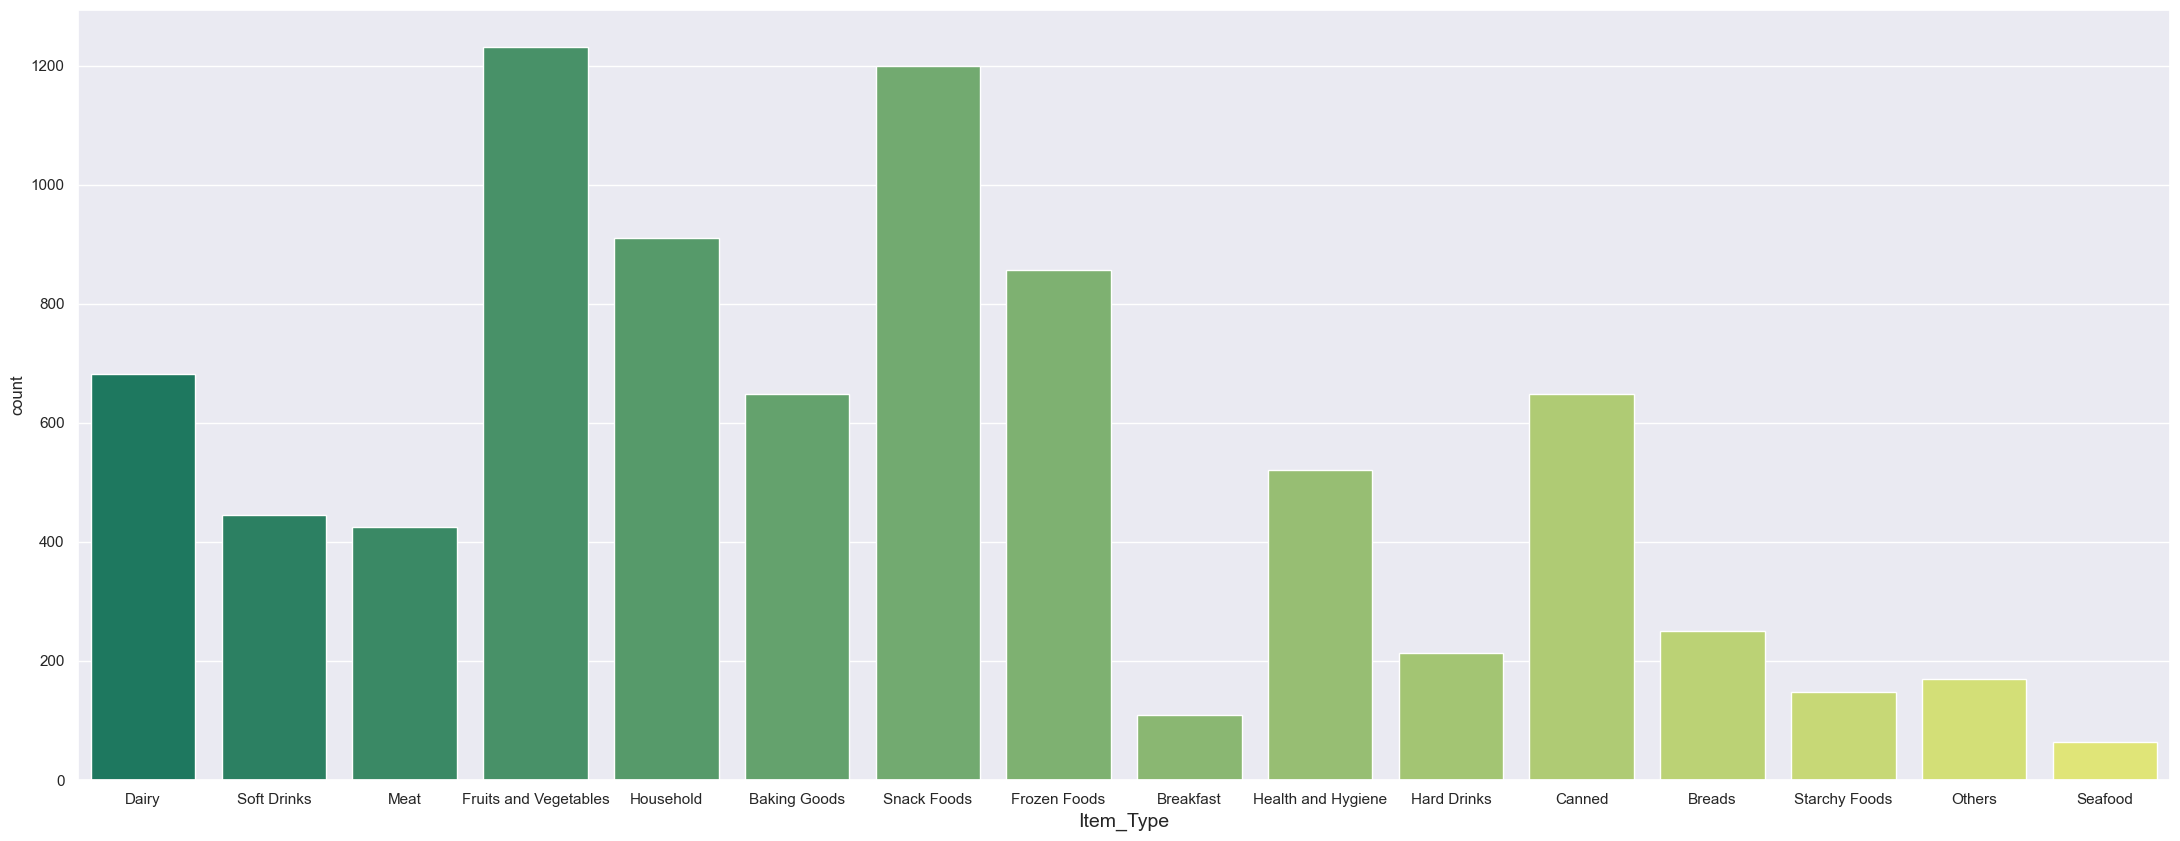

In [22]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=tr_df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

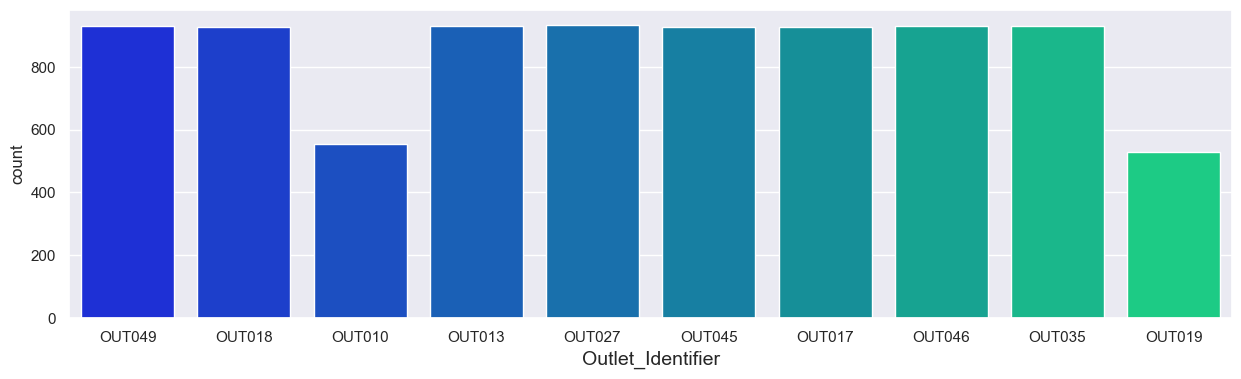

In [23]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=tr_df ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

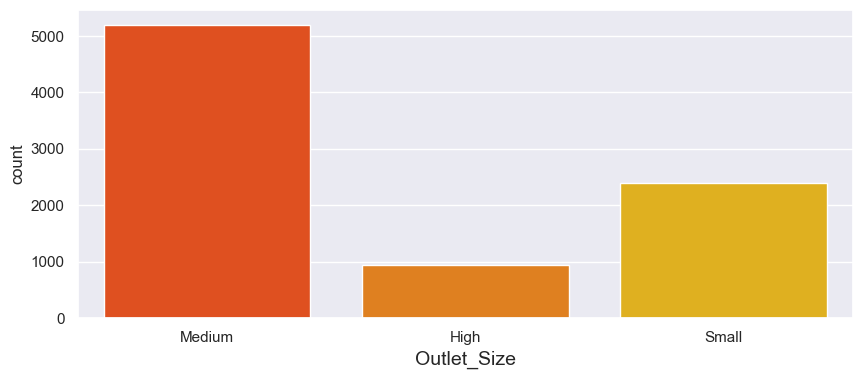

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=tr_df ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

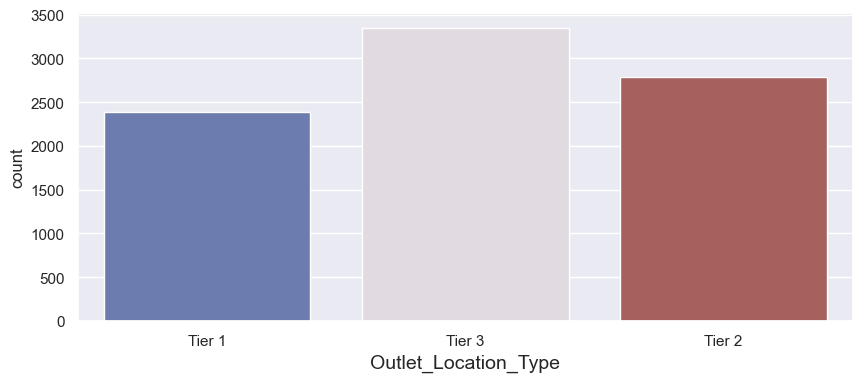

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=tr_df ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

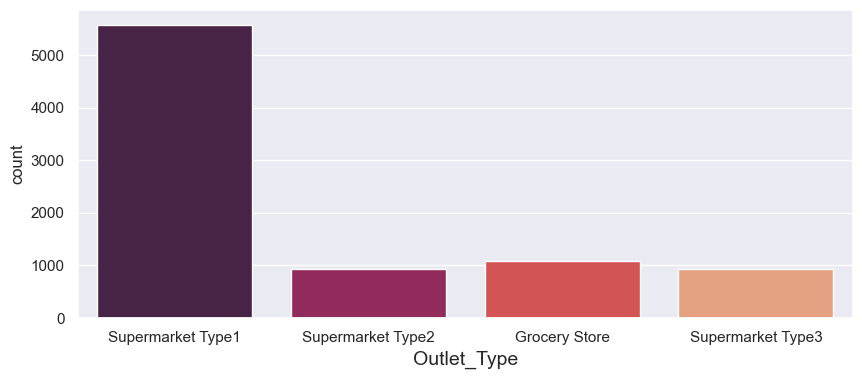

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=tr_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

##### Categoric columns realizations

* `Item_Fat_Content` - Most items sold are low fat.
* `Item_Type` - Item types that are distictly popular are `fruits and vegetables` and `snack foods`.
* `Outlet_Identifier` - Sold items are ditributed evenly among outlets excluding `OUT010` and `OUT019` that are significanly lower.
* `Outlet_Size` - Bigmart outlets are mostly medium sized in our data.
* `Outlet_Location_Type` - The most common type is `Tier3`.
* `Outlet_Type` - By a wide margin the mode outlet type is `Supermarket Type1`.

Now for the numerical columns:

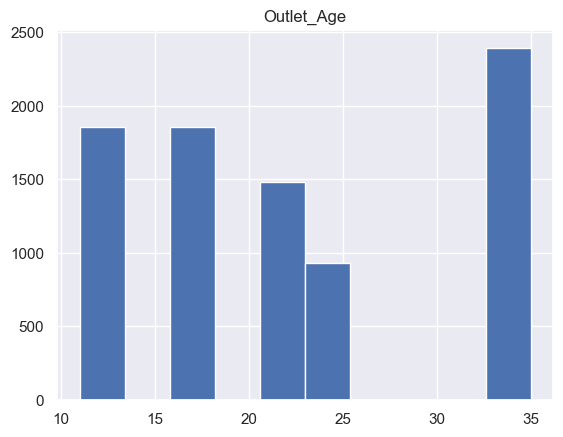

In [27]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  tr_df[num]

plt.hist(tr_df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

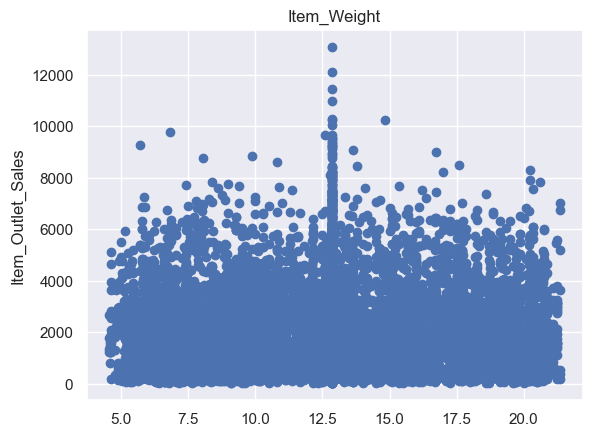

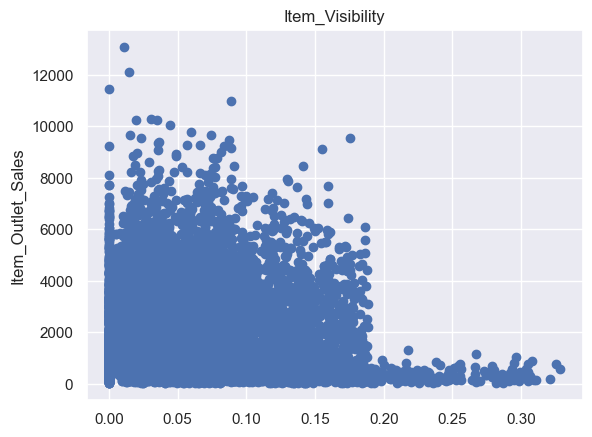

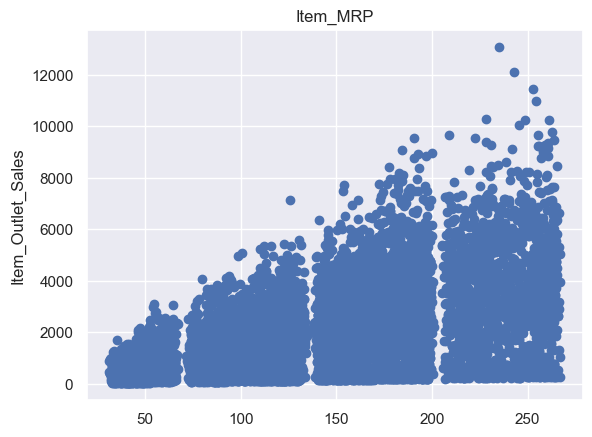

In [28]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

##### numeric columns realizations

* `Outlet_Age` - The most common outlets are 35 years old.
* `Item_Weight` - The data is very spreaded, no specific pattern.
* `Item_Visibility` - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
* `Item_MRP` - Items with higher MRP tend to sell better in most cases.


#### Multivariate plots
I want to check the following relationships with `Item_Outlet_Sales`:
* Sales per item type
* Sales per outlet
* Sales per outlet type
* Sales per outlet size
* Sales per location type

SyntaxError: invalid syntax (2319350262.py, line 3)

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(data):
    # Copy the data to avoid modifying the original DataFrame
    data = data.copy()

    # Handle missing values
    data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
    data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')

    # Feature engineering
    data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
        'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'
    })
    data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2])
    data['New_Item_Type'] = data['New_Item_Type'].map({
        'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'
    })

    # Drop unnecessary columns
    data = data.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Item_Fat_Content'] = label_encoder.fit_transform(data['Item_Fat_Content'])
    data['Outlet_Size'] = label_encoder.fit_transform(data['Outlet_Size'])

    # One-hot encoding for other categorical variables
    data = pd.get_dummies(data, columns=['Item_Type', 'Outlet_Type'], drop_first=True)

    # Scale numerical features
    numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    return data


In [3]:
# Define data visualization functions
def plot_target_distribution(data, target_column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[target_column], kde=True)
    plt.title(f'Distribution of {target_column}')
    plt.show()

def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(data):
    # Copy the data to avoid modifying the original DataFrame
    data = data.copy()

    # Handle missing values
    data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
    data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')

    # Feature engineering
    data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
        'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'
    })
    data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2])
    data['New_Item_Type'] = data['New_Item_Type'].map({
        'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'
    })

    # Drop unnecessary columns
    data = data.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

    # Encoding categorical variables
    label_encoder = LabelEncoder()
    data['Item_Fat_Content'] = label_encoder.fit_transform(data['Item_Fat_Content'])
    data['Outlet_Size'] = label_encoder.fit_transform(data['Outlet_Size'])
    data['Outlet_Location_Type'] = label_encoder.fit_transform(data['Outlet_Location_Type'])
    data['New_Item_Type'] = label_encoder.fit_transform(data['New_Item_Type'])

    # One-hot encoding for other categorical variables
    data = pd.get_dummies(data, columns=['Item_Type', 'Outlet_Type'], drop_first=True)

    # Scale numerical features
    numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    return data


In [16]:
# Load the data
train_data = pd.read_csv('../data/raw/Train.csv')

# Apply the data preprocessing function
processed_train_data = preprocess_data(train_data)

# Display the first few rows of the processed data
print(processed_train_data.head())


   Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0    -0.841872                 0        -0.970732  1.747454   
1    -1.641706                 1        -0.908111 -1.489023   
2     1.098554                 0        -0.956917  0.010040   
3     1.500838                 1        -1.281758  0.660050   
4    -0.929428                 0        -1.281758 -1.399220   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                       1999            1                     0   
1                       2009            1                     2   
2                       1999            1                     0   
3                       1998            1                     2   
4                       1987            0                     2   

   Item_Outlet_Sales  New_Item_Type  Item_Type_Breads  ...  \
0          3735.1380              1             False  ...   
1           443.4228              0             False  ...   
2          2097.2700            

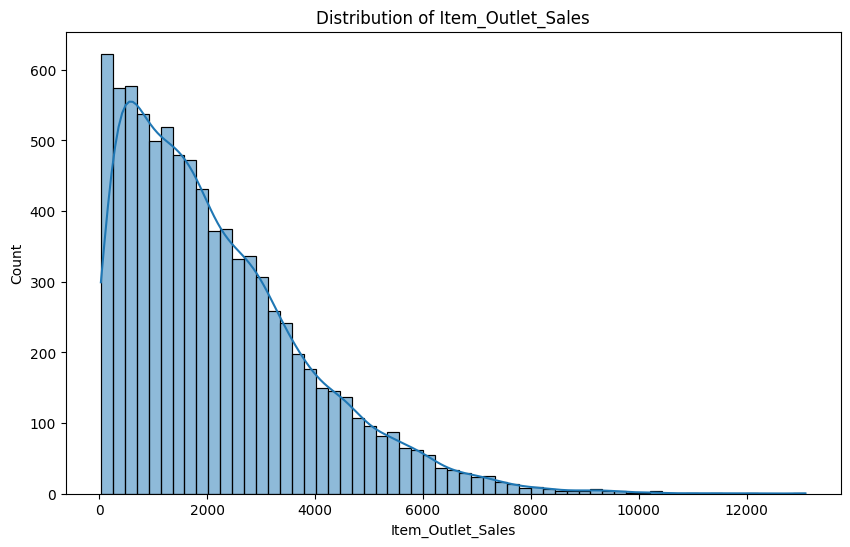

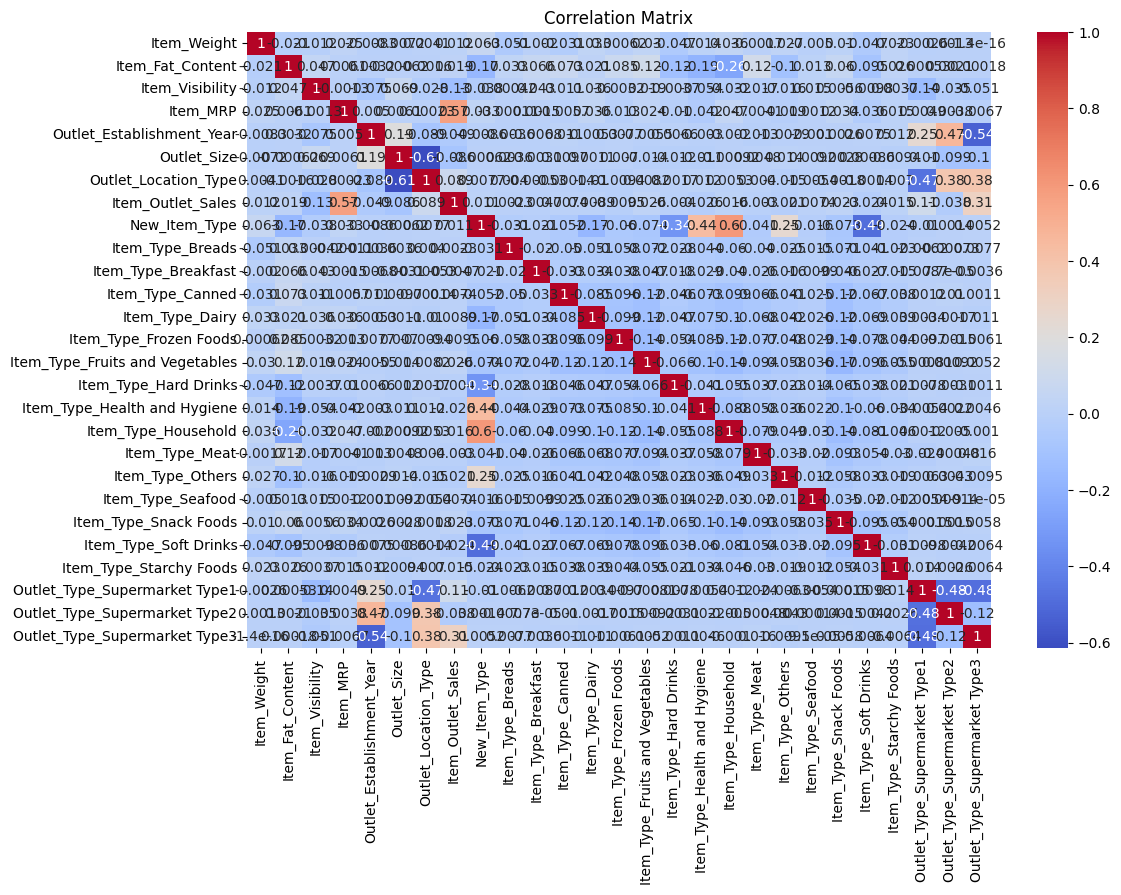

In [17]:
# Visualize the processed data
target_column = 'Item_Outlet_Sales'
plot_target_distribution(processed_train_data, target_column)
plot_correlation_matrix(processed_train_data)


In [18]:
# Train and evaluate the model
trained_model = train_and_evaluate_model(processed_train_data, target_column)


Mean Squared Error: 1211577.728283131
